In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

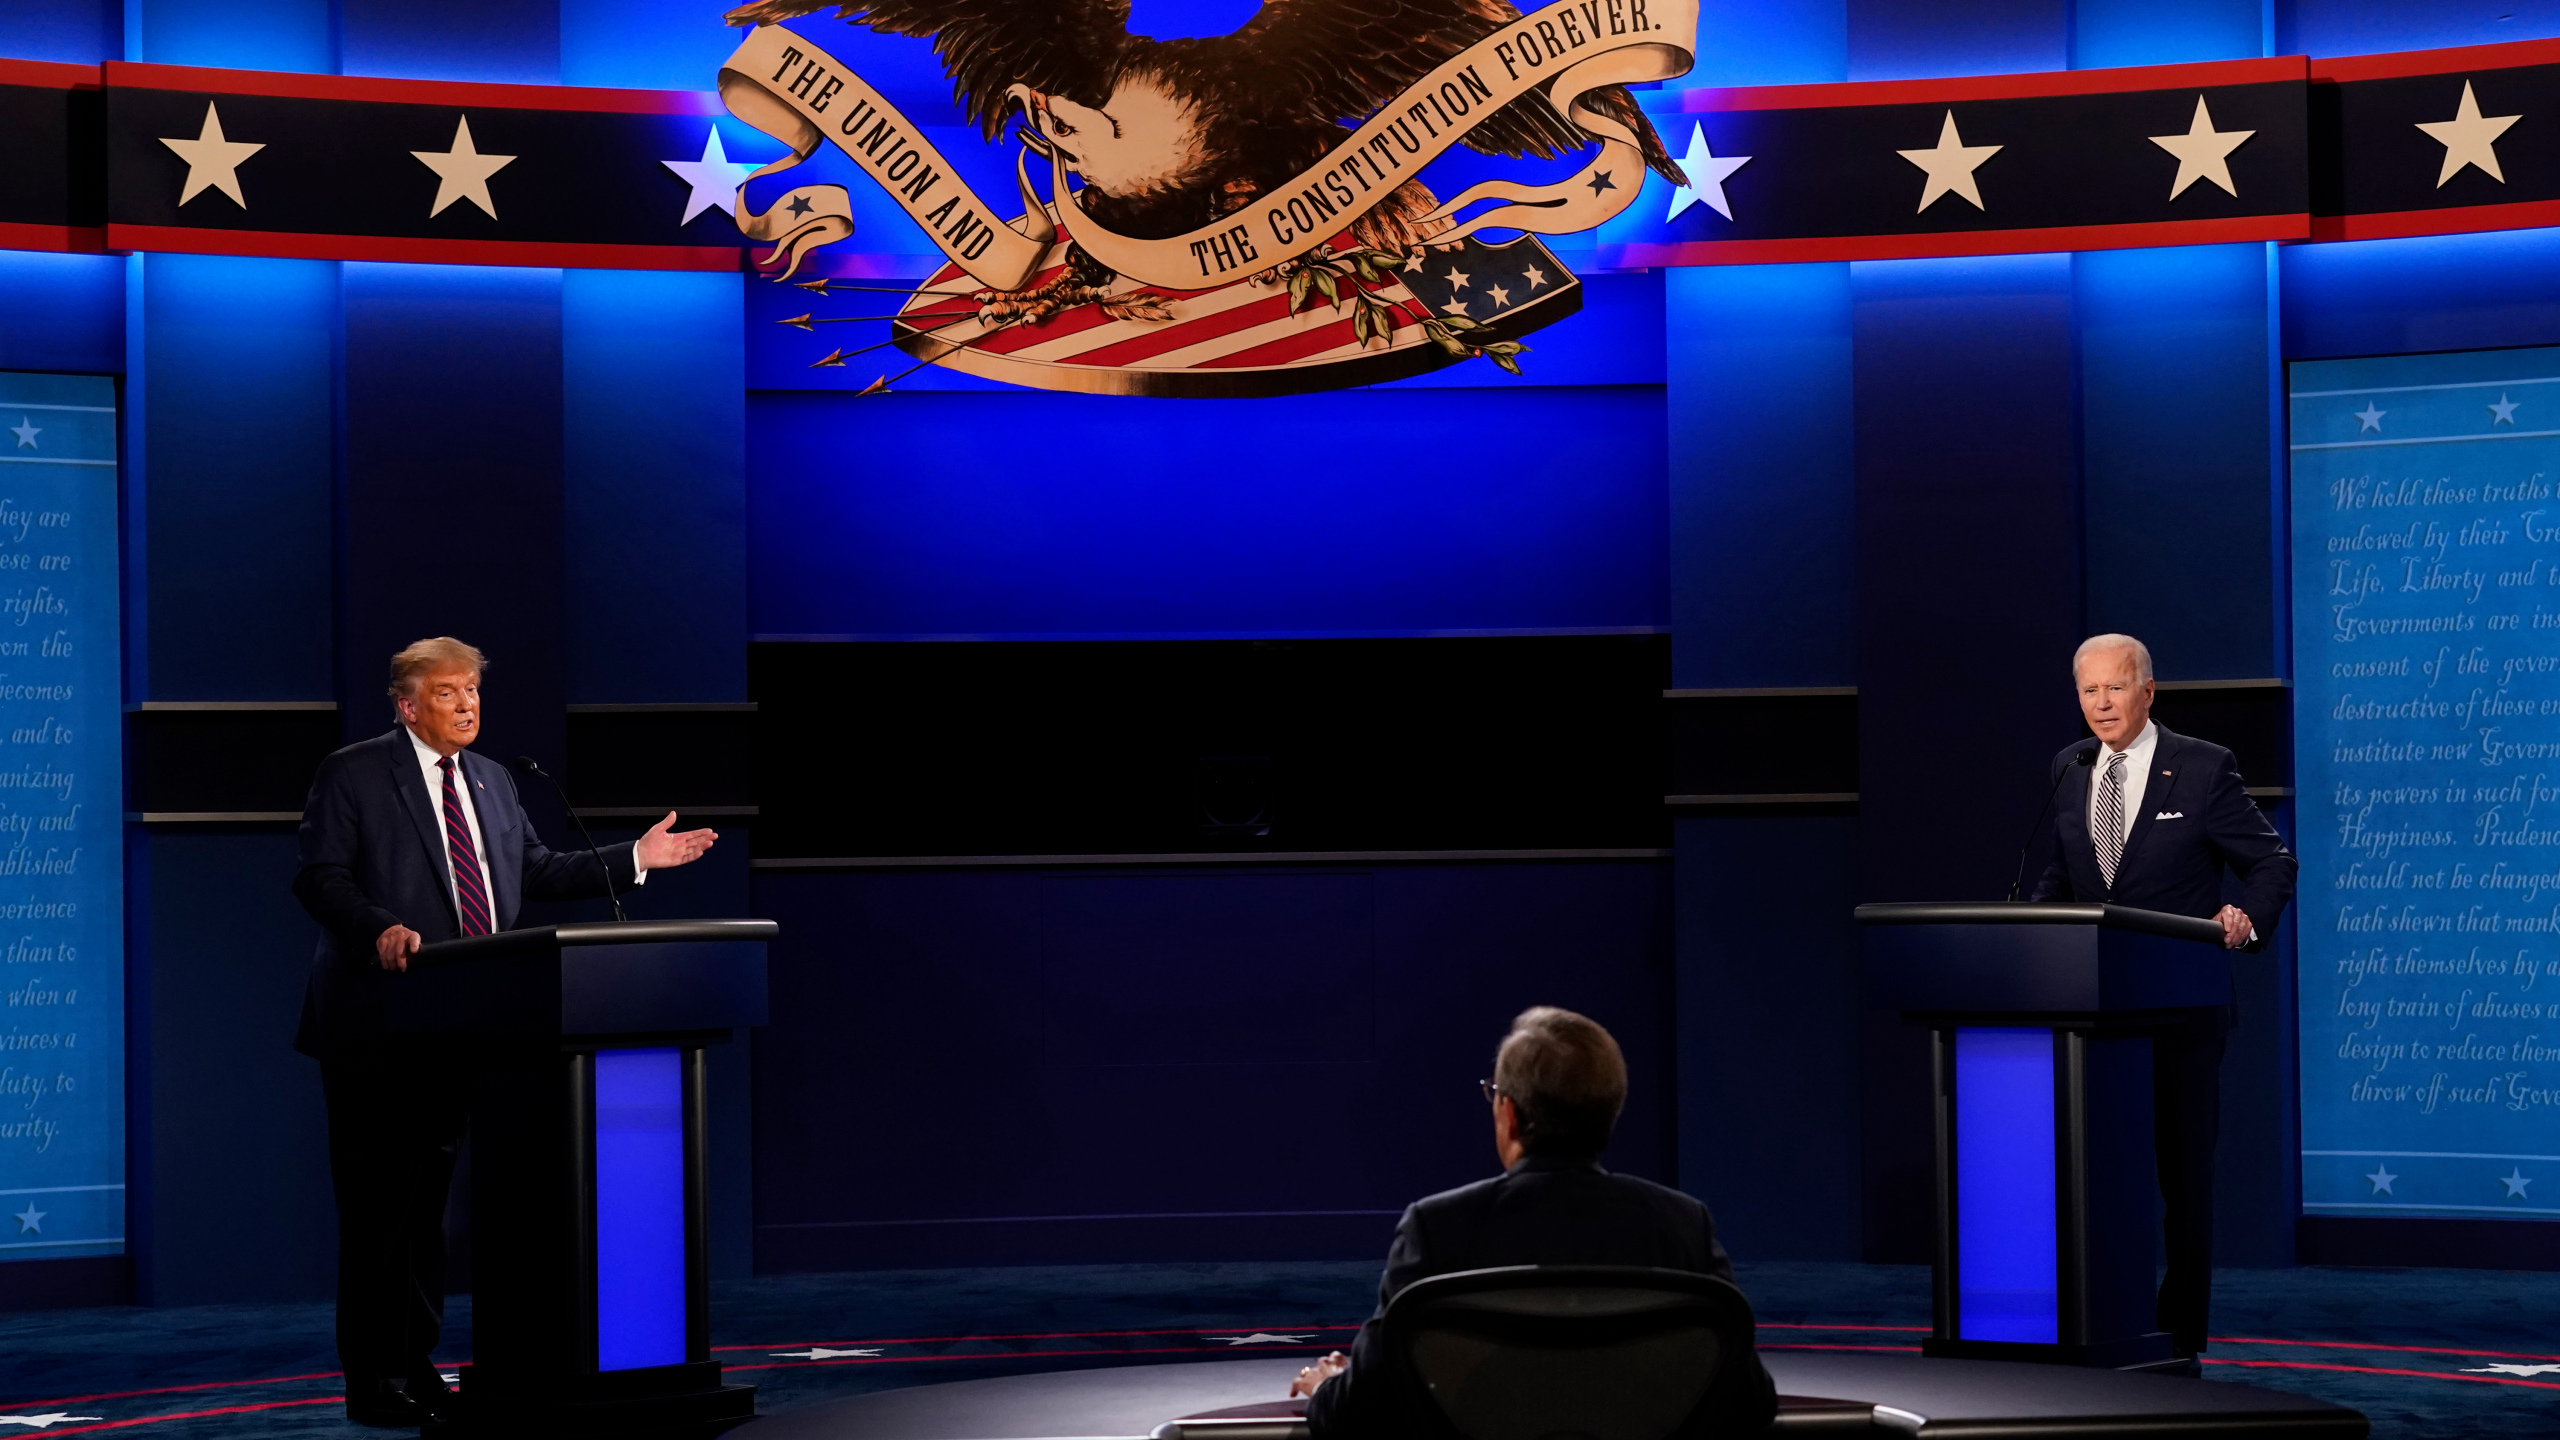

In [3]:
from IPython.display import Image
Image(filename='Election6.jpg')

In [4]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [11]:
twitter2 = pd.read_csv('JosephBiden.csv')

In [12]:
twitter2.head()

,TWEET,COMMENTS,LIKES,RETWEETS
0,Vote for America. http://iwillvote.com,12.5K,142.1K,55K
1,I just stepped off the stage at tonight’s town...,3.3K,18K,3.4K
2,"If I'm elected president, you won't hear me ra...",4.3K,35.6K,7.3K
3,How will I ensure the rights of LGBTQ+ people ...,3.5K,122.8K,17.5K
4,We have to heal this nation.,2.4K,40.2K,7.4K


In [13]:
twitter2.isnull().sum()

TWEET       0
COMMENTS    0
LIKES       0
RETWEETS    0
dtype: int64

In [14]:
twitter2.shape

(625, 4)

In [15]:
twitter2_tweets = twitter2['TWEET']

In [16]:
type(twitter2_tweets)

pandas.core.series.Series

In [17]:
twitter2_tweets.shape

(625,)

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
import spacy

In [20]:
twitter2_tweets.head()

0              Vote for America.  http://iwillvote.com
1    I just stepped off the stage at tonight’s town...
2    If I'm elected president, you won't hear me ra...
3    How will I ensure the rights of LGBTQ+ people ...
4                         We have to heal this nation.
Name: TWEET, dtype: object

In [21]:
tweets = []

for tweet in twitter2_tweets:
    tweets.append(tweet)

In [22]:
sentences = []

for twt in tweets:
    snts = twt.split()
    sentences.append(snts)

In [24]:
words = []

for i in sentences:
    for k in i:
        words.append(k)

In [25]:
words[:11]

['Vote',
 'for',
 'America.',
 'http://iwillvote.com',
 'I',
 'just',
 'stepped',
 'off',
 'the',
 'stage',
 'at']

In [ ]:
# words is a list of all the words that the tweets consists of

In [26]:
len(words)

18262

# HASHTAGS

In [28]:
hshtgs = []
words_list = []

for j in words:
    if j.startswith('#'):
        hshtgs.append(j)
    else:
        words_list.append(j)              

In [29]:
len(hshtgs)

55

In [30]:
hshtgs[:15]

['#NationalDessertDay',
 '#gapol',
 '#DayOfTheGirl',
 '#NationalComingOutDay',
 '#WorldMentalHealthDay',
 '#ImVotingFor',
 '#BidenTownHall',
 '#NationalVoterRegistrationDay',
 '#RoshHashanah',
 '#NationalBlackVoterDay',
 '#NationalBlackVoterDay',
 '#BidenTownHall',
 '#BidenTownHall',
 '#BidenTownHall',
 '#BidenTownHall']

In [31]:
hshtgs = [x.lower() for x in hshtgs]

In [32]:
# # Removing the '#' from the hashtags

main_tags = []

for tgs in hshtgs:
    tgs = tgs.replace('#',"")
    main_tags.append(tgs)

In [33]:
main_tags[:11]

['nationaldessertday',
 'gapol',
 'dayofthegirl',
 'nationalcomingoutday',
 'worldmentalhealthday',
 'imvotingfor',
 'bidentownhall',
 'nationalvoterregistrationday',
 'roshhashanah',
 'nationalblackvoterday',
 'nationalblackvoterday']

In [34]:
tags_str = []

for sr in main_tags:
    sr = str(sr)
    tags_str.append(sr)

In [40]:
len(tags_str)

55

In [35]:
# Removing Punctuations from the 'tags' list which consists of hashtags

import re
tags_str = [re.sub(r'[^A-Za-z0-9]+','', x) for x in tags_str]

In [36]:
from wordcloud import WordCloud

In [37]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(tags_str))

# HASHTAGS WORDCLOUD

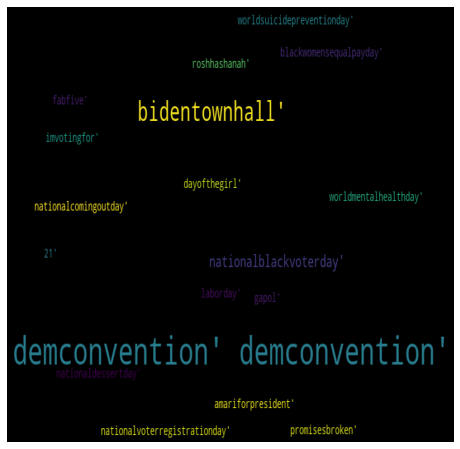

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('biden_hashtag_wordcloud.png', dpi=100)
plt.show()

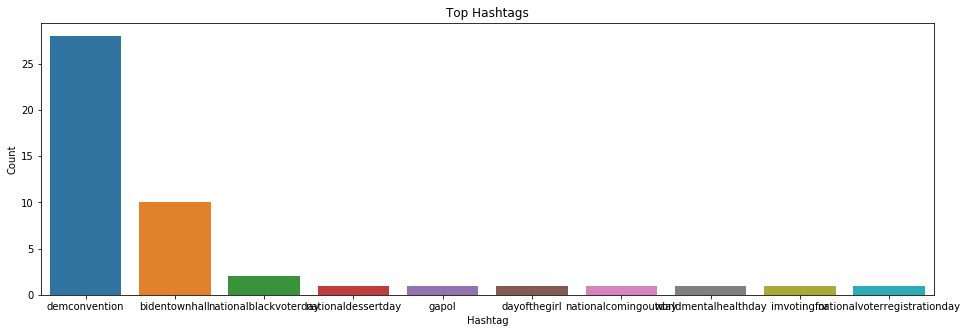

In [41]:
import seaborn as sns
a = nltk.FreqDist(tags_str)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Top Hashtags')
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('biden_top_hashtags.png', dpi=100)
plt.show()

In [44]:
hashtag_freq_list = d

In [45]:
hashtag_freq_list

,Hashtag,Count
16,demconvention,28
6,bidentownhall,10
9,nationalblackvoterday,2
0,nationaldessertday,1
1,gapol,1
2,dayofthegirl,1
3,nationalcomingoutday,1
4,worldmentalhealthday,1
5,imvotingfor,1
7,nationalvoterregistrationday,1


In [ ]:
# As the punctuations have been removed, now let's remove the stopwords from the words list 

In [46]:
import re
words_list = [re.sub(r'[^A-Za-z0-9]+','', x.lower()) for x in words_list] 

In [47]:
all_words = []
for m in words_list:
    if m != "":
        all_words.append(m)
        

In [48]:
len(all_words)

17939

In [49]:
import nltk
from nltk.corpus import stopwords
stp = stopwords.words('english')

In [50]:
filter_words = []

for i in all_words:
    if i in stp:
        pass
    else:
        filter_words.append(i)

In [51]:
len(filter_words)

9818

In [ ]:
# I did not use stemming to bring down the words to their root words because
# some of the stemmed words seemed not correct
# Hence I removed the idea of Stemming

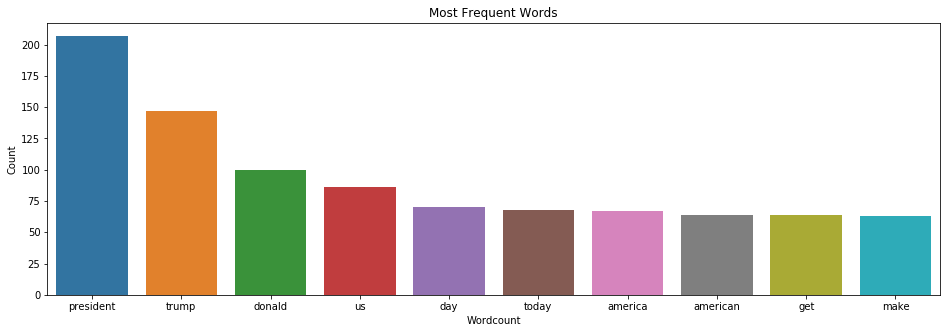

In [52]:
aa = nltk.FreqDist(filter_words)
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('biden_all_freq.png', dpi=100)
plt.show()

In [53]:
biden_freq_list = dd

In [54]:
biden_freq_list

,Wordcount,Count
21,president,207
110,trump,147
115,donald,100
34,us,86
90,day,70
183,today,68
1,america,67
44,american,64
118,get,64
95,make,63


In [55]:
wrdcld = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(filter_words))

# WORDCLOUD FOR ALL THE WORDS IN THE TWEETS

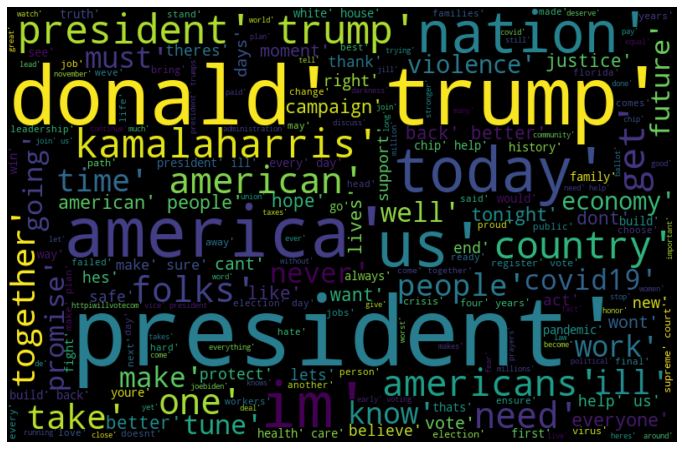

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wrdcld, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('biden_most_freq_wordcloud.png', dpi=100)
plt.show()